In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fldr="/content/drive/MyDrive/CK+48"
fldr

'/content/drive/MyDrive/CK+48'

In [ ]:
import os
files=os.listdir(fldr)
print(files)

['sadness', 'anger', 'surprise', 'fear', 'disgust', 'contempt', 'happy']


In [ ]:

Exp=['fear', 'contempt', 'happy', 'anger', 'surprise', 'disgust', 'sadness']

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
i=0
last=[]
images=[]
labels=[]
for fle in files:
  idx=Exp.index(fle)
  label=idx
  
  total=fldr+'/'+fle
  files_exp= os.listdir(total)

  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    print(file_main+"   "+str(label))
    image= cv2.imread(file_main)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)

/content/drive/MyDrive/CK+48/sadness/S026_002_00000014.png   6
/content/drive/MyDrive/CK+48/sadness/S011_002_00000020.png   6
/content/drive/MyDrive/CK+48/sadness/S011_002_00000021.png   6
/content/drive/MyDrive/CK+48/sadness/S014_002_00000015.png   6
/content/drive/MyDrive/CK+48/sadness/S014_002_00000016.png   6
/content/drive/MyDrive/CK+48/sadness/S011_002_00000022.png   6
/content/drive/MyDrive/CK+48/sadness/S014_002_00000014.png   6
/content/drive/MyDrive/CK+48/sadness/S026_002_00000016.png   6
/content/drive/MyDrive/CK+48/sadness/S080_005_00000011.png   6
/content/drive/MyDrive/CK+48/sadness/S071_002_00000019.png   6
/content/drive/MyDrive/CK+48/sadness/S042_002_00000016.png   6
/content/drive/MyDrive/CK+48/sadness/S042_002_00000014.png   6
/content/drive/MyDrive/CK+48/sadness/S046_001_00000024.png   6
/content/drive/MyDrive/CK+48/sadness/S026_002_00000015.png   6
/content/drive/MyDrive/CK+48/sadness/S064_004_00000013.png   6
/content/drive/MyDrive/CK+48/sadness/S066_004_00000009.

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:

last


[84, 219, 468, 543, 720, 774, 981]

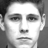

In [ ]:

cv2_imshow(images[24])

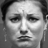

In [ ]:
cv2_imshow(images[40])

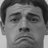

In [ ]:
cv2_imshow(images[82])

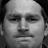

In [ ]:
cv2_imshow(images[200])

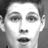

In [ ]:

cv2_imshow(images[300])

In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
images_f=np.array(images)
labels_f=np.array(labels)

images_f_2=images_f/255

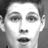

In [ ]:

cv2_imshow(images[300])

In [ ]:

images_f_2.shape

(981, 48, 48, 3)

In [ ]:

num_of_classes=7
labels_encoded=tf.keras.utils.to_categorical(labels_f,num_classes=num_of_classes)



In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_encoded,test_size=0.25)


In [ ]:

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(128,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  output= Dense(7,activation="sigmoid")(drop_1)

  model = Model(inputs=[inputs], outputs=[output])

  model.compile(loss="categorical_crossentropy", optimizer="Adam",
	metrics=["accuracy"])
  return model

In [ ]:

Model=model(input_shape = (48,48,3))
     

In [ ]:

Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [ ]:
#TRAINING

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:

fle_s='Emotion_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=10,callbacks=[callback_list])

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.1060 - accuracy: 0.2109
Epoch 1: loss improved from inf to 2.10595, saving model to Emotion_detection.h5
23/23 [==============================] - 9s 319ms/step - loss: 2.1060 - accuracy: 0.2109 - val_loss: 2.0396 - val_accuracy: 0.2520
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.9464 - accuracy: 0.2721
Epoch 2: loss improved from 2.10595 to 1.94635, saving model to Emotion_detection.h5
23/23 [==============================] - 9s 372ms/step - loss: 1.9464 - accuracy: 0.2721 - val_loss: 1.9334 - val_accuracy: 0.3171
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 1.7385 - accuracy: 0.3796
Epoch 3: loss improved from 1.94635 to 1.73850, saving model to Emotion_detection.h5
23/23 [==============================] - 8s 367ms/step - loss: 1.7385 - accuracy: 0.3796 - val_loss: 1.6063 - val_accuracy: 0.4106
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 1.3205

In [ ]:

score = Model.evaluate(X_train, Y_train)

23/23 [==============================] - 1s 54ms/step - loss: 0.3895 - accuracy: 0.9401


In [ ]:

score = Model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 54ms/step - loss: 0.5211 - accuracy: 0.8902


In [ ]:

Pred=Model.predict(X_test)

8/8 [==============================] - 1s 90ms/step


In [ ]:

Pred

array([[0.35295638, 0.5387851 , 0.18175118, ..., 0.29481164, 0.82331103,
        0.57555485],
       [0.8652373 , 0.2974515 , 0.99996305, ..., 0.43908945, 0.48788768,
        0.10828071],
       [0.9024637 , 0.75154334, 0.96426594, ..., 0.5335061 , 0.34980252,
        0.26796004],
       ...,
       [0.9759679 , 0.94522077, 0.30128783, ..., 0.74499595, 0.3601617 ,
        0.7142454 ],
       [0.7590165 , 0.19537333, 0.29800138, ..., 0.99963343, 0.6890043 ,
        0.84036016],
       [0.9875089 , 0.2946981 , 0.7660017 , ..., 0.99999696, 0.47217438,
        0.6748346 ]], dtype=float32)

In [ ]:

Y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:

len(Pred)

246

In [ ]:
i=0 
Y_test_l=[] 
Pred_l=[] 
while(i<len(Pred)):   
  Y_test_l.append(int(np.argmax(Y_test[i])))     
  Pred_l.append(int(np.argmax(Pred[i])))   
  i+=1


In [ ]:
def test_image(ind, images_f, images_f_2, Model): 
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual: " + Exp[labels[ind]] ) 
  pred_1=Model.predict(np.array([image_test]))

#print(pred_1)
  pred_class=Exp[int(np.argmax(pred_1))] 
  print("Predicted Label: "+ pred_class)

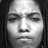

Label actual: anger
1/1 [==============================] - 0s 54ms/step
Predicted Label: anger


In [ ]:
test_image(147,images_f,images_f_2,Model)

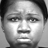

Label actual: sadness
1/1 [==============================] - 0s 37ms/step
Predicted Label: sadness


In [ ]:
test_image(70,images_f,images_f_2,Model)

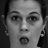

Label actual: surprise
1/1 [==============================] - 0s 34ms/step
Predicted Label: surprise


In [ ]:
test_image(369,images_f,images_f_2,Model)

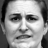

Label actual: fear
1/1 [==============================] - 0s 38ms/step
Predicted Label: anger


In [ ]:
test_image(502,images_f,images_f_2,Model)

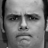

Label actual: anger
1/1 [==============================] - 0s 44ms/step
Predicted Label: anger


In [ ]:
test_image(122,images_f,images_f_2,Model)

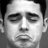

Label actual: sadness
1/1 [==============================] - 0s 41ms/step
Predicted Label: sadness


In [ ]:
test_image(36,images_f,images_f_2,Model)

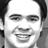

Label actual: happy
1/1 [==============================] - 0s 38ms/step
Predicted Label: happy


In [ ]:
test_image(800,images_f,images_f_2,Model)

In [ ]:
import matplotlib.pyplot as plt

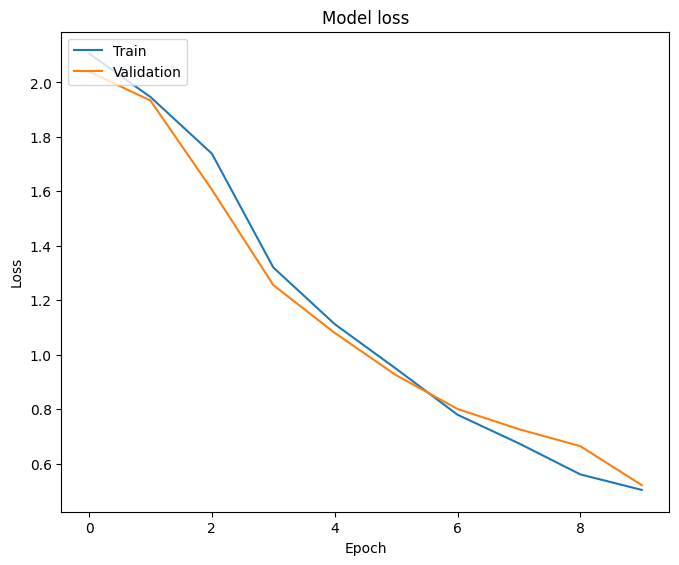

In [ ]:

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

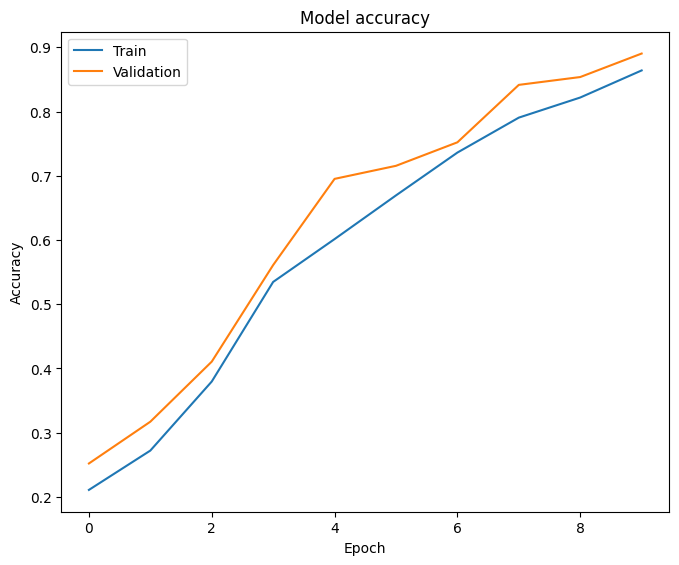

In [ ]:

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [ ]:
i=0 
Y_test_l=[] 
Pred_l=[] 
while(i<len(Pred)):   
  Y_test_l.append(int(np.argmax(Y_test[i])))     
  Pred_l.append(int(np.argmax(Pred[i])))   
  i+=1
report=classification_report(Y_test_l, Pred_l)

In [ ]:


report=classification_report(Y_test_l, Pred_l)

In [ ]:

print(report)

              precision    recall  f1-score   support

           0       0.64      0.86      0.73        21
           1       1.00      0.73      0.85        15
           2       0.95      1.00      0.97        54
           3       0.87      0.87      0.87        39
           4       0.94      0.98      0.96        62
           5       1.00      0.90      0.95        30
           6       0.74      0.56      0.64        25

    accuracy                           0.89       246
   macro avg       0.88      0.84      0.85       246
weighted avg       0.90      0.89      0.89       246



In [ ]:
results = confusion_matrix(Y_test_l, Pred_l)

<Axes: >

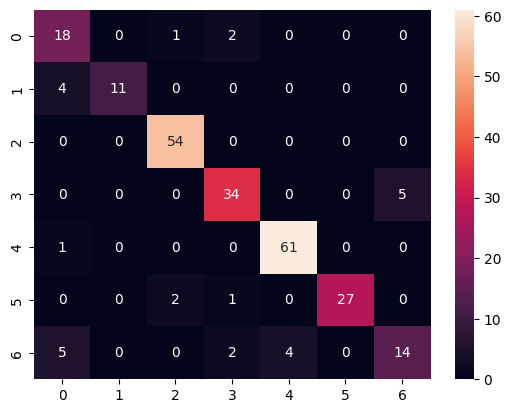

In [ ]:

import seaborn as sns

sns.heatmap(results, annot=True)